In [1]:
using AutomotiveDrivingModels

In [2]:
include(Pkg.dir("AutomotiveDrivingModels", "viz", "Renderer.jl")); using .Renderer
include(Pkg.dir("AutomotiveDrivingModels", "viz", "ColorScheme.jl")); using .ColorScheme

In [3]:
include(Pkg.dir("AutomotiveDrivingModels", "viz", "incl_cairo_utils.jl"))

    map(Any, Reactive.Signal...) at /home/tim/.julia/v0.4/Reactive/src/operators.jl:26
is ambiguous with: 
    map(Function, Lazy.List...) at /home/tim/.julia/v0.4/Lazy/src/liblazy.jl:98.
To fix, define 
    map(Function)
before the new definition.
    map(Any, Reactive.Signal...) at /home/tim/.julia/v0.4/Reactive/src/operators.jl:26
is ambiguous with: 
    map(DataType, Lazy.List...) at /home/tim/.julia/v0.4/Lazy/src/liblazy.jl:99.
To fix, define 
    map(DataType)
before the new definition.
  likely near /home/tim/.julia/v0.4/Reel/src/Reel.jl:14
  likely near /home/tim/.julia/v0.4/Reel/src/Reel.jl:14
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in require at loading.jl:243
 [inlined code] from /home/tim/.julia/v0.4/Requires/src/require.jl:11
 in require at /home/tim/.julia/v0.4/Requires/src/hook.jl:17
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in include_string at lo

In [4]:
const STREETMAP_DIR = "/media/tim/DATAPART1/Data/Bosch/processed/streetmaps"
streetmap_files = filter(readdir(STREETMAP_DIR)) do content
    path = joinpath(STREETMAP_DIR,content)
    isfile(path) && endswith(content, ".jld")
end
println("available streetnetworks:")
streetmap_files

available streetnetworks:


 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in require at loading.jl:243
 [inlined code] from /home/tim/.julia/v0.4/Requires/src/require.jl:11
 in require at /home/tim/.julia/v0.4/Requires/src/hook.jl:17
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/tim/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /home/tim/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading /home/tim/.julia/v0.4/Reel/src/Reel.jl, in expression starting on line 85
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in require at loading.jl:243
 [inlined code] from /home/tim/.julia/v0.4/Requires/src/require.jl:11
 in require at /home/tim/.julia/v0.4/Requires/src/hook.jl:17
 in include at ./boot.jl:261
 in

12-element Array{ByteString,1}:
 "streetmap_280N_big.jld"                  
 "streetmap_280_pagemill_to_92.jld"        
 "streetmap_280_pagemill_to_92_old.jld"    
 "streetmap_280S_big.jld"                  
 "streetmap_circuit_2lane.jld"             
 "streetmap_detroit_v4.jld"                
 "streetmap_highway_1lane.jld"             
 "streetmap_highway_2lane.jld"             
 "streetmap_highway_3lane.jld"             
 "streetmap_highway_4lane.jld"             
 "streetmap_its_both_loops_v3_smoothed.jld"
 "streetmap_its_inner_loop_v1_2.jld"       

In [5]:
# csv_filepath = "/media/tim/DATAPART1/Data/Bosch/source5/2015-12-14-14-39-22_planning_stripped-raw.csv"
# csv_filepath = "/media/tim/DATAPART1/Data/Bosch/source5/2015-12-14-15-04-57_92_to_pagemill_manual_drive_planning_stripped-raw.csv"
# csv_filepath = "/media/tim/DATAPART1/Data/Bosch/source5/2015-12-22-13-50-09_280N_manual_drive_lane_changes_planning_stripped-raw.csv"
# csv_filepath = "/media/tim/DATAPART1/Data/Bosch/source5/2015-12-22-14-05-41_280S_manual_drive_lane_changes_planning_stripped-raw.csv"
# csv_filepath = "/media/tim/DATAPART1/Data/Bosch/source4/2015-02-05-14-03-40_driving_style_data_martin-raw.csv"

# csv_filepath = "/media/tim/DATAPART1/Data/Bosch/philippruns_20160223/manual_2016-02-23-15-07-30_planning_stripped-raw.csv"
# csv_filepath = "/media/tim/DATAPART1/Data/Bosch/philippruns_20160223/manual2_2016-02-23-15-42-56_planning_stripped-raw.csv"
csv_filepath = "/media/tim/DATAPART1/Data/Bosch/philippruns_20160223/manual2_2016-02-23-15-55-53_planning_stripped-raw.csv"

"/media/tim/DATAPART1/Data/Bosch/philippruns_20160223/manual2_2016-02-23-15-55-53_planning_stripped-raw.csv"

In [6]:
header, trajdata, sn = load_header_trajdata_and_streetmap(csv_filepath)
extract_params = PrimaryDataExtractionParams()
"done"

"done"

Interact.Slider{Int64}(Signal{Int64}(7438, nactions=0),"frame",7438,1:14876,true)

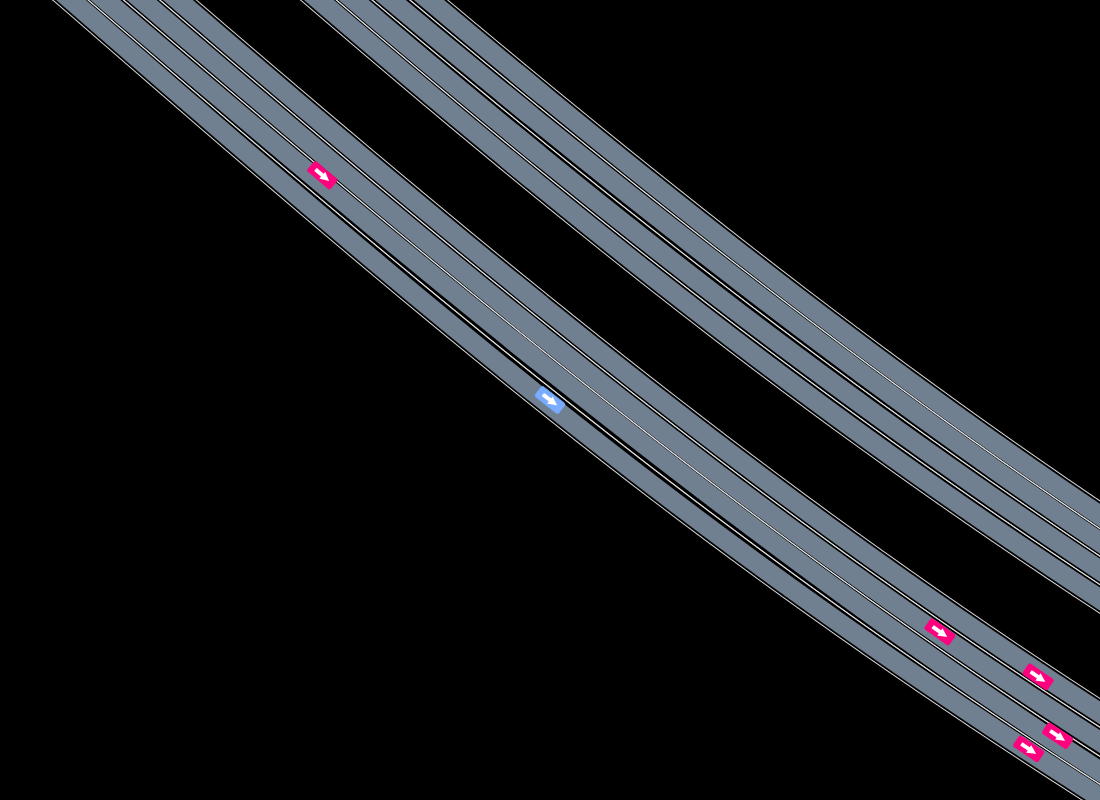

In [7]:
plot_manipulable_trajdata(trajdata, sn, canvas_height=800)

In [8]:
tic()
extract_params.threshold_percent_outliers_error = 20.0
runlogs = extract_runlogs(trajdata, sn, extract_params, header)
toc()

elapsed time: 84

84.484638188

In [9]:
length(runlogs)

1

.484638188 seconds


Interact.Slider{Int64}(Signal{Int64}(6307, nactions=0),"frame",6307,1:12614,true)

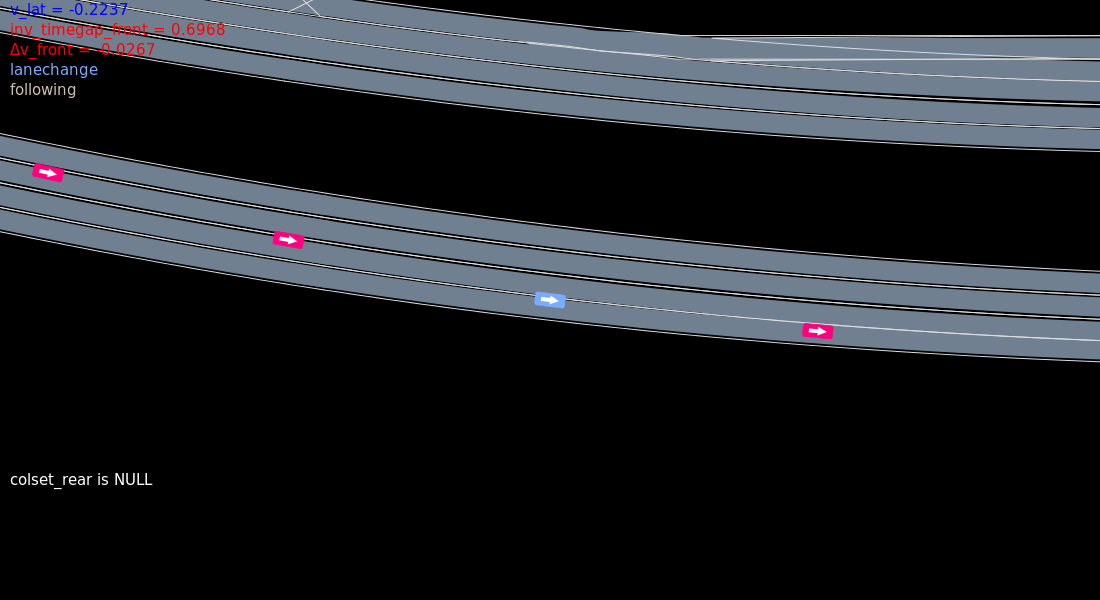

In [10]:
include(Pkg.dir("AutomotiveDrivingModels", "viz", "incl_cairo_utils.jl"))
overlays = Overlay[]

push!(overlays, TextStatsOverlay())
# push!(overlays, TrajdataOverlay(trajdata))
# push!(overlays, EgoToLeftCarOverlay())
push!(overlays, EgoToRearCarOverlay())

plot_manipulable_runlog(runlogs[1], sn, RunLogs.ID_EGO, canvas_height=600, overlays=overlays)

# Load Jeremy NGSIM CSV

The first four columns contain simulated values (d=distance to car in front, r=relative speed, s=speed, a=accel), and the second four columns contain “real” values.  Every 120 rows corresponds to a new trajectory.  The first 21 values in each trajectory should be the same corresponding to t=-2 sec through t=0.

This comes from a Gaussian mixture network.

In [11]:
ngsim = readtable("jeremy_trajs.csv", header=false, 
                    names=[:d_sim, :r_sim, :s_sim, :a_sim, :d_true, :r_true, :s_true, :a_true]);

# Plot Smoothness

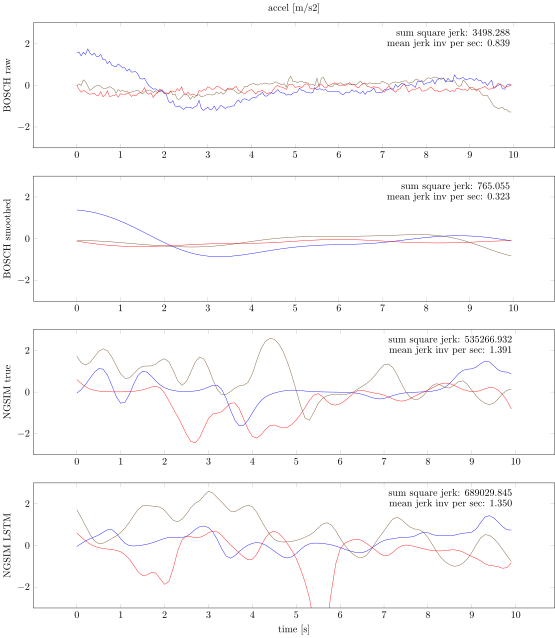

In [14]:
using PGFPlots

g = GroupPlot(1, 4) # NGSIM true, NGSIM GMM, BOSCH raw, BOSCH smooth

plot_width = "20cm"
plot_height = "6cm"
ymin=-3
ymax=3

let # BOSCH raw and smoothed
    traj_nframes = 200
    runlog_frame_offset = 100
    n_trajs = 3
    p_raw = PGFPlots.Plots.Plot[]
    p_smooth = PGFPlots.Plots.Plot[]
    
    runlog = runlogs[1]

    jerk_inv = 0
    sum_square_jerk = 0.0
    for i in 3 : ncol(trajdata)
        jerk_prev = trajdata[i-1, :accEx] - trajdata[i-2, :accEx]
        jerk_curr = trajdata[i-0, :accEx] - trajdata[i-1, :accEx]
        jerk_inv += sign(jerk_prev) != sign(jerk_curr)
        sum_square_jerk += (jerk_curr/(trajdata[i-1, :time] - trajdata[i, :time]))^2
    end
    jerk_inv_per_sec = jerk_inv/(trajdata[end, :time] - trajdata[1, :time])
    push!(p_raw, Plots.Node(@sprintf("mean jerk inv per sec: %.3f", jerk_inv_per_sec),10,2,style="left"))
    push!(p_raw, Plots.Node(@sprintf("sum square jerk: %.3f", sum_square_jerk),10,2.5,style="left"))
    
    jerk_inv = 0
    sum_square_jerk = 0.0
    for frame in 3 : nframes(runlog)
        colset_m0 = id2colset(runlog, ID_EGO, frame)
        colset_m1 = id2colset(runlog, ID_EGO, frame-1)
        colset_m2 = id2colset(runlog, ID_EGO, frame-2)

        jerk_prev = get(ACCBX, runlog, sn, colset_m1, frame-1) - get(ACCBX, runlog, sn, colset_m2, frame-2)
        jerk_curr = get(ACCBX, runlog, sn, colset_m0, frame-0) - get(ACCBX, runlog, sn, colset_m1, frame-1)
        jerk_inv += sign(jerk_prev) != sign(jerk_curr)
        sum_square_jerk += (jerk_curr/(RunLogs.get_elapsed_time(runlog, frame-1, frame)))^2
    end
    jerk_inv_per_sec = jerk_inv/(get(runlog, nframes(runlog), :time) - get(runlog, 1, :time))
    push!(p_smooth, Plots.Node(@sprintf("mean jerk inv per sec: %.3f", jerk_inv_per_sec),10,2,style="left"))
    push!(p_smooth, Plots.Node(@sprintf("sum square jerk: %.3f", sum_square_jerk),10,2.5,style="left"))
    
    traj_pos_start = VecSE2[]
    for i in 1 : n_trajs
        frames = collect(traj_nframes*(i-1)+1+runlog_frame_offset : traj_nframes*i+runlog_frame_offset)
        time = get(runlog, frames, :time)
        time -= time[1]
        accels = map(frame->get(ACCBX, runlog, sn, id2colset(runlog, ID_EGO, frame), frame), frames)
        push!(p_smooth, PGFPlots.Plots.Linear(time, accels, style="mark=none"))
        push!(traj_pos_start, get(runlog, id2colset(runlog, ID_EGO, frames[1]), frames[1], :inertial))
    end

    ax_smooth =  Axis(p_smooth, ylabel="BOSCH smoothed", height=plot_height, width=plot_width, ymin=ymin, ymax=ymax)
    
    for pos_start in traj_pos_start
        frame_start = indmin([hypot(trajdata[i, :posGx] - pos_start.x, trajdata[i, :posGy] - pos_start.y) for i in 1:nrow(trajdata)])
        frames = collect(frame_start : frame_start+traj_nframes-1)
        time = trajdata[frames, :time]
        time -= time[1]
        accels = trajdata[frames, :accEx]
        push!(p_raw, PGFPlots.Plots.Linear(time, accels, style="mark=none"))
    end

    ax_raw = Axis(p_raw, ylabel="BOSCH raw", height=plot_height, width=plot_width, ymin=ymin, ymax=ymax)
    
    push!(g, ax_raw)
    push!(g, ax_smooth)
end

let
    frames_per_traj = 120
    bake_in_frames = 20
    framerate = 0.1
    traj_nframes = frames_per_traj - bake_in_frames
    
    p_true = PGFPlots.Plots.Plot[]
    p_lstm = PGFPlots.Plots.Plot[]
    
    jerk_inv = 0
    sum_square_jerk = 0.0
    frame = bake_in_frames
    frames_into_traj = 0
    frame_count = 0
    while frame < nrow(ngsim)
        frame += 1
        frames_into_traj += 1
        frame_count += 1
        
        jerk_prev = ngsim[frame-1, :a_true] - ngsim[frame-2, :a_true]
        jerk_curr = ngsim[frame-0, :a_true] - ngsim[frame-1, :a_true]
        jerk_inv += sign(jerk_prev) != sign(jerk_curr)
        sum_square_jerk += (jerk_curr/framerate)^2
        
        if frames_into_traj == traj_nframes
            frames_into_traj = 0
            frame += bake_in_frames
        end
    end
    jerk_inv_per_sec = jerk_inv/(frame_count*framerate)
    push!(p_true, Plots.Node(@sprintf("mean jerk inv per sec: %.3f", jerk_inv_per_sec),10,2,style="left"))
    push!(p_true, Plots.Node(@sprintf("sum square jerk: %.3f", sum_square_jerk),10,2.5,style="left"))
    
    jerk_inv = 0
    sum_square_jerk = 0.0
    frame = bake_in_frames
    frames_into_traj = 0
    frame_count = 0
    while frame < nrow(ngsim)
        frame += 1
        frames_into_traj += 1
        frame_count += 1
        
        jerk_prev = ngsim[frame-1, :a_sim] - ngsim[frame-2, :a_sim]
        jerk_curr = ngsim[frame-0, :a_sim] - ngsim[frame-1, :a_sim]
        jerk_inv += sign(jerk_prev) != sign(jerk_curr)
        sum_square_jerk += (jerk_curr/framerate)^2
        
        if frames_into_traj == traj_nframes
            frames_into_traj = 0
            frame += bake_in_frames
        end
    end
    jerk_inv_per_sec = jerk_inv/(frame_count*framerate)
    push!(p_lstm, Plots.Node(@sprintf("mean jerk inv per sec: %.3f", jerk_inv_per_sec),10,2,style="left"))
    push!(p_lstm, Plots.Node(@sprintf("sum square jerk: %.3f", sum_square_jerk),10,2.5,style="left"))
    
    
    for i in 1 : 3
        frames = collect(frames_per_traj*(i-1)+1+bake_in_frames : frames_per_traj*i)
        time = framerate*collect(1:length(frames))
        time -= time[1]
        accels = ngsim[frames, :a_true]
        push!(p_true, PGFPlots.Plots.Linear(time, accels, style="mark=none"))
    end
    ax_true = Axis(p_true, ylabel="NGSIM true", height=plot_height, width=plot_width, ymin=ymin, ymax=ymax)
    push!(g, ax_true)
    
    
    for i in 1 : 3
        frames = collect(frames_per_traj*(i-1)+1+bake_in_frames : frames_per_traj*i)
        time = framerate*collect(1:length(frames))
        time -= time[1]
        accels = ngsim[frames, :a_sim]
        push!(p_lstm, PGFPlots.Plots.Linear(time, accels, style="mark=none"))
    end
    ax_lstm = Axis(p_lstm, ylabel="NGSIM LSTM", height=plot_height, width=plot_width, ymin=ymin, ymax=ymax)
    push!(g, ax_lstm)
end

g.axes[1].title = "accel [m/s2]"
g.axes[end].xlabel = "time [s]"

g